In [1]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
baseline = pd.read_csv('./example/results/polybench-baseline.csv')
baseline

,name,status,latency,DSP_usage,FF_usage,LUT_usage,BRAM_18K_usage,URAM_usage,DSP_avail,FF_avail,LUT_avail,BRAM_18K_avail,URAM_avail
0,bicg,SUCCESS,959805,15,1784,1525,0,0,4272,850560,425280,2160,80
1,floyd-warshall,SUCCESS,250000004,1,346,641,0,0,4272,850560,425280,2160,80
2,gemm,SUCCESS,10610001,26,2120,1895,0,0,4272,850560,425280,2160,80
3,gesummv,SUCCESS,375026,15,2076,1584,0,0,4272,850560,425280,2160,80
4,jacobi-1d,SUCCESS,162901,14,1582,1463,0,0,4272,850560,425280,2160,80
5,jacobi-2d,SUCCESS,36907901,17,2741,3015,0,0,4272,850560,425280,2160,80
6,mvt,SUCCESS,1290402,14,1664,1635,0,0,4272,850560,425280,2160,80


In [8]:
polymer_lt_ap = pd.read_csv('./example/results/polybench-polymer-lt-ap.csv')
polymer_lt_ap

,name,status,latency,DSP_usage,FF_usage,LUT_usage,BRAM_18K_usage,URAM_usage,DSP_avail,FF_avail,LUT_avail,BRAM_18K_avail,URAM_avail
0,bicg,SUCCESS,579714,144,13787,17144,0,0,4272,850560,425280,2160,80
1,floyd-warshall,SUCCESS,203191933,24,2009,5326,0,0,4272,850560,425280,2160,80
2,gemm,SUCCESS,6009455,191,11253,13720,0,0,4272,850560,425280,2160,80
3,gesummv,SUCCESS,131514,137,12554,18610,0,0,4272,850560,425280,2160,80
4,jacobi-1d,SUCCESS,123301,56,6322,7321,0,0,4272,850560,425280,2160,80
5,jacobi-2d,SUCCESS,14296601,150,16812,18169,0,0,4272,850560,425280,2160,80
6,mvt,SUCCESS,698473,56,5286,8010,0,0,4272,850560,425280,2160,80


In [27]:
df = pd.DataFrame({
  'name': baseline.sort_values(['name'])['name'],
  'baseline': baseline.sort_values(['name'])['latency'],
  'polymer_lt_ap': polymer_lt_ap.sort_values(['name'])['latency'],
})
df['speedup'] = df['baseline'] / df['polymer_lt_ap']
df

,name,baseline,polymer_lt_ap,speedup
0,bicg,959805,579714,1.655653
1,floyd-warshall,250000004,203191933,1.230364
2,gemm,10610001,6009455,1.765551
3,gesummv,375026,131514,2.851605
4,jacobi-1d,162901,123301,1.321165
5,jacobi-2d,36907901,14296601,2.581586
6,mvt,1290402,698473,1.847462


<AxesSubplot:xlabel='name'>

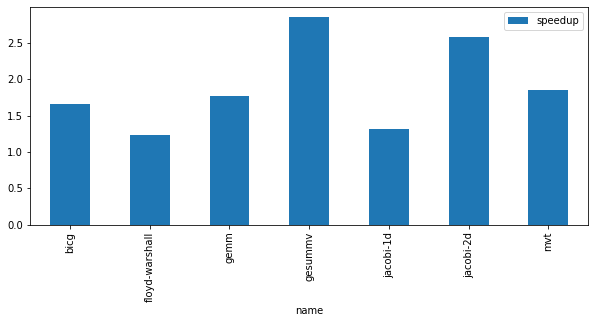

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df.plot(x='name', y=['speedup'], kind='bar', ax=ax)
ax.hline(y=1.0,linewidth=1, color='k')
